In [12]:
# Libraries and utilities
# Libraries and utilities

import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler, OneHotEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold,RepeatedStratifiedKFold, RandomizedSearchCV,GridSearchCV, RepeatedKFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    
)

from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import learning_curve

from sklearn.neighbors import NearestNeighbors 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from pyod.models.abod import ABOD
from pyod.models.knn import KNN

In [14]:
df_train=pd.read_csv("../Dataset_prepared/Prepared_train.csv")
df_test=pd.read_csv("../Dataset_prepared/Prepared_test.csv")

df_train.drop('actor',axis=1,inplace=True)
df_train.drop('filename',axis=1,inplace=True)

df_test.drop('actor',axis=1,inplace=True)
df_test.drop('filename',axis=1,inplace=True)

# One-hot encoding
cat_var=["statement","repetition","sex","emotional_intensity","vocal_channel"]
le=preprocessing.LabelEncoder()
for i in cat_var:
    df_train[i]=le.fit_transform(df_train[i])
categorical_col = ["emotion"]

df_train = pd.get_dummies(df_train, columns=categorical_col)    

"""
# Label encoding for train and test
le=preprocessing.LabelEncoder()
c = df_train.select_dtypes(include=['object']).columns.tolist()
for i in c:
    df_train[i]=le.fit_transform(df_train[i])
for i in c:
    df_test[i]=le.fit_transform(df_test[i])
"""

"""

# Normalization of train and test
scaler = StandardScaler()
numeric_features = [n for n in df_train.columns if n!="emotion_angry" and n!="emotion_calm" and  n!="emotion_disgust" and  n!="emotion_fearful" and  n!="emotion_happy" and  n!="emotion_neutral" and n!="emotion_sad" and  n!="emotion_surprised" and n!= "vocal_channel" and n!= "emotional_intensity" and n!= "statement" and n!= "repetition" and n!= "sex" and n!="filename" and n!="actor"]
scaled_features = scaler.fit_transform(df_train[numeric_features])
df_train[numeric_features] = scaled_features
scaled_features_test = scaler.transform(df_test[numeric_features])
df_test[numeric_features] = scaled_features_test

"""

'\n\n# Normalization of train and test\nscaler = StandardScaler()\nnumeric_features = [n for n in df_train.columns if n!="emotion_angry" and n!="emotion_calm" and  n!="emotion_disgust" and  n!="emotion_fearful" and  n!="emotion_happy" and  n!="emotion_neutral" and n!="emotion_sad" and  n!="emotion_surprised" and n!= "vocal_channel" and n!= "emotional_intensity" and n!= "statement" and n!= "repetition" and n!= "sex" and n!="filename" and n!="actor"]\nscaled_features = scaler.fit_transform(df_train[numeric_features])\ndf_train[numeric_features] = scaled_features\nscaled_features_test = scaler.transform(df_test[numeric_features])\ndf_test[numeric_features] = scaled_features_test\n\n'

In [17]:
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE

In [19]:

mds = MDS(n_components=2) #, normalized_stress='auto') # shoudl run as sammon mapping
X_train_mds = mds.fit_transform(df_train)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [20]:
X_train_mds

array([[ 268394.38047136, -397119.33209537],
       [ 244707.68712351, -319749.75692653],
       [ 226388.11919439, -303739.79891794],
       ...,
       [ 332827.01636072, -394968.77062951],
       [ 394772.64260071, -343737.64409604],
       [ 429151.88568905, -274386.62688321]])

In [21]:
clf_LOF = LocalOutlierFactor(n_neighbors = 17)
y_pred = clf_LOF.fit_predict(X_train_mds)
y_outliers = X_train_mds[y_pred==-1]
np.unique(y_pred, return_counts=True)

(array([-1,  1]), array([  26, 1802]))

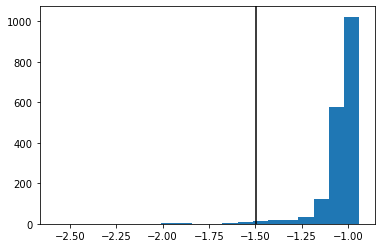

In [22]:
plt.hist(clf_LOF.negative_outlier_factor_, bins=20)
plt.axvline(np.min(clf_LOF.negative_outlier_factor_[np.where(y_pred==1)]), c='k')
plt.show()

Text(0.5, 1.0, 'LOF Outliers')

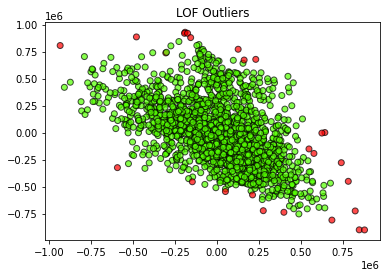

In [23]:
plt.scatter(X_train_mds[:, 0], X_train_mds[:, 1], c=y_pred, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.title("LOF Outliers")

In [24]:
pca = PCA(n_components=2)
pca.fit(df_train)
X_pca = pca.transform(df_train)



In [25]:
clf_LOF = LocalOutlierFactor(n_neighbors = 17)
y_pred = clf_LOF.fit_predict(X_pca)
y_outliers = X_pca[y_pred==-1]
np.unique(y_pred, return_counts=True)

(array([-1,  1]), array([  25, 1803]))

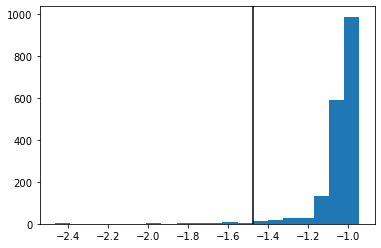

In [27]:
plt.hist(clf_LOF.negative_outlier_factor_, bins=20)
plt.axvline(np.min(clf_LOF.negative_outlier_factor_[np.where(y_pred==1)]), c='k')
plt.show()

Text(0.5, 1.0, 'LOF Outliers')

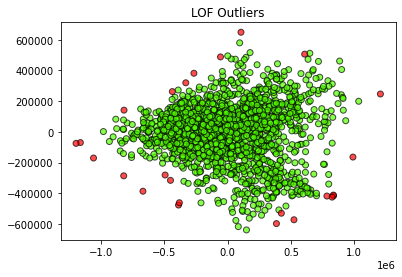

In [26]:



plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.title("LOF Outliers")

In [28]:
# list with indexes and scores only for outliers --> np.where(y_pred==-1)
outlier_indexes = np.where(y_pred==-1)[0]
outlier_scores = clf_LOF.negative_outlier_factor_[outlier_indexes]

outlier_factor_list = []
for i in range(0,len(outlier_scores)):
    outlier_factor_list.append((outlier_indexes[i], outlier_scores[i]))
print(len(outlier_factor_list))

#We sort in ascending order with respect to LOF factor
def outlier_score(elem):
    return elem[1]
outlier_factor_list = sorted(outlier_factor_list, key=outlier_score)
outlier_factor_list[:10]

25


[(1819, -2.4640773890678247),
 (1423, -2.394099293017826),
 (1818, -2.272472033137556),
 (1702, -2.21022259896336),
 (1420, -2.0040903235290735),
 (1367, -1.9725143652063348),
 (1204, -1.9394887200240079),
 (1422, -1.8979298212184204),
 (425, -1.8512096896409285),
 (1387, -1.7950510971322295)]

In [33]:
top1perc = int(float(len(df_train))*0.01)
top1perc

top_outliers_LOF = outlier_factor_list[:top1perc]
print(len(top_outliers_LOF))

indexes_list = [i[0] for i in top_outliers_LOF] #retrieve indexes of outliers
df_LOF_outliers = df_train.iloc[indexes_list]
df_LOF_outliers

18


,vocal_channel,emotional_intensity,statement,repetition,sex,mean,q25,q50,q75,kur,...,stft_kur_w4,stft_skew_w4,emotion_angry,emotion_calm,emotion_disgust,emotion_fearful,emotion_happy,emotion_neutral,emotion_sad,emotion_surprised
1819,1,1,0,1,0,-1.834512e-07,-0.000366,0.000000,0.000488,21.708608,...,-0.757745,-0.512022,0,0,1,0,0,0,0,0
1423,0,1,0,1,0,-2.358484e-07,-0.000366,0.000000,0.000427,5.113687,...,-0.418581,-0.801104,0,1,0,0,0,0,0,0
1818,1,1,0,0,0,-1.590157e-08,-0.000366,0.000000,0.000397,17.369828,...,-0.950053,-0.356922,0,0,1,0,0,0,0,0
1702,1,0,0,0,1,5.474721e-05,-0.003815,-0.000092,0.003723,20.580156,...,2.036498,-1.440128,0,0,0,1,0,0,0,0
1420,0,1,1,0,0,1.699123e-06,-0.000336,0.000000,0.000183,4.873952,...,-0.892319,-0.632698,0,1,0,0,0,0,0,0
1367,1,0,0,1,0,2.695109e-07,-0.000031,0.000000,0.000000,7.824765,...,0.846823,-1.062278,0,0,0,0,1,0,0,0
1204,0,0,1,0,0,4.307826e-07,-0.001373,0.000000,0.001953,12.050618,...,-1.169525,0.512528,0,0,0,0,0,1,0,0
1422,0,1,0,0,0,-1.947781e-07,-0.000366,0.000000,0.000336,4.502132,...,-0.643998,-0.628909,0,1,0,0,0,0,0,0
425,1,1,1,1,1,1.323930e-07,-0.000061,0.000000,0.000061,51.805771,...,0.700807,-1.189344,0,1,0,0,0,0,0,0
1387,1,1,0,1,0,-5.398735e-08,-0.000977,0.000000,0.000946,15.759554,...,0.339185,-0.924751,1,0,0,0,0,0,0,0
